In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
x_values=list(map(int,input().split()))
y_values=list(map(int,input().split()))
x_values=np.array(x_values)
y_values=np.array(y_values)

joint_pmf=[]
for i in range(len(x_values)):
  xprob=list(map(float,input().split()))
  joint_pmf.append(xprob)
prob_mat=np.zeros((len(x_values),len(y_values)))

for i in range(len(x_values)):
  prob_mat[i]=joint_pmf[i]

marginal_x=np.sum(prob_mat,axis=1)
marginal_y=np.sum(prob_mat,axis=0)


flag=True
for k in range(len(joint_pmf)):
  for l in range(len(joint_pmf[0])):
    if joint_pmf[k][l]!=marginal_x[k]*marginal_y[l]:
      flag=False
      break
if flag==True:
  print('Is Independent Random Variable')
elif flag==False:
  print('Is not Independent Random Variable')

1 2
1 2 3
0.1 0.2 0.2
0.1 0.2 0.2
Is Independent Random Variable


## Plotting Joint PMF, Joint PDF and Marginal PMF and CDF

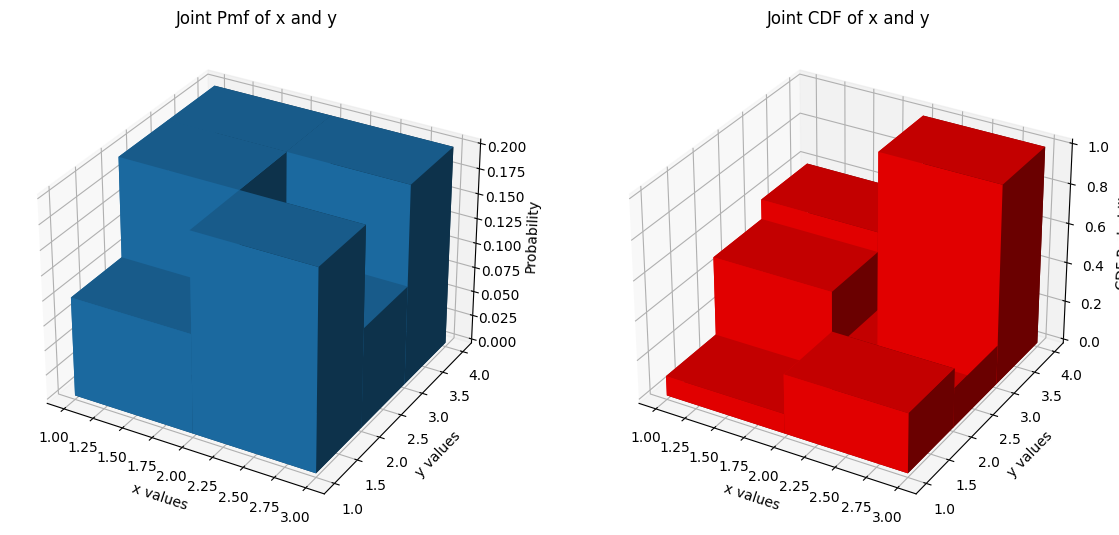

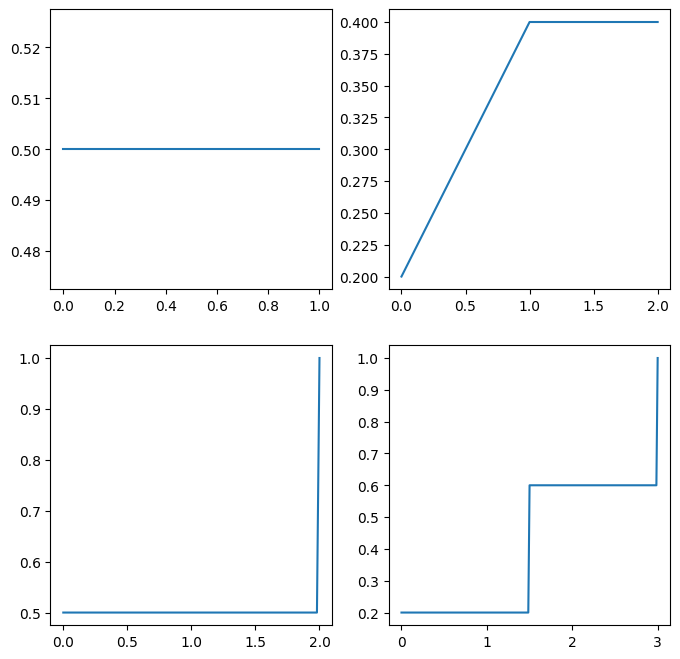

In [ ]:
joint_cdf=np.cumsum(np.cumsum(prob_mat,axis=0),axis=1)
marginal_x=np.sum(prob_mat,axis=1)
marginal_y=np.sum(prob_mat,axis=0)

marginal_cdfx=[]
for i in range(len(marginal_x)):
  marginal_cdfx+=[marginal_x[i]]
  if i<len(marginal_x)-1:
    marginal_cdfx+=[0]*100

marginal_cdfx=np.cumsum(marginal_cdfx)/np.sum(marginal_cdfx)
x_valuess=np.linspace(0,len(marginal_x),len(marginal_cdfx))


marginal_cdfy=[]
for i in range(len(marginal_y)):
  marginal_cdfy+=[marginal_y[i]]
  if i<len(marginal_y)-1:
    marginal_cdfy+=[0]*100
marginal_cdfy=np.cumsum(marginal_cdfy)/np.sum(marginal_cdfy)
y_valuess=np.linspace(0,len(marginal_y),len(marginal_cdfy))

X,Y=np.meshgrid(x_values,y_values)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,14),subplot_kw={'projection':'3d'})

ax[0].bar3d(X.flatten(),Y.flatten(),np.zeros(len(prob_mat.flatten())),1,1,prob_mat.flatten(),shade=True)
ax[0].set_xlabel('x values')
ax[0].set_ylabel('y values')
ax[0].set_zlabel('Probability')
ax[0].set_title('Joint Pmf of x and y')

ax[1].bar3d(X.flatten(),Y.flatten(),np.zeros(len(joint_cdf.flatten())),1,1,joint_cdf.flatten(),shade=True,color='r')
ax[1].set_xlabel('x values')
ax[1].set_ylabel('y values')
ax[1].set_zlabel('CDF Probability')
ax[1].set_title('Joint CDF of x and y')
plt.show()

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,8))
ax[0][0].plot(np.arange(len(marginal_x)),marginal_x)
ax[0][1].plot(np.arange(len(marginal_y)),marginal_y)
ax[1][0].plot(x_valuess,marginal_cdfx)
ax[1][1].plot(y_valuess,marginal_cdfy)

In [ ]:
x_multiple = x_values
y_multiple = y_values.reshape(len(y_values), 1)

expectation_x = np.dot(x_multiple, np.sum(prob_mat, axis=1))
expectation_y = np.dot(y_multiple.T, np.sum(prob_mat, axis=0))

expectation_xy = np.sum(prob_mat * np.outer(x_multiple, y_multiple))
print("E[XY]=", expectation_xy)

X1 = x_multiple - expectation_x
Y1 = y_multiple.flatten() - expectation_y

X1_multiple = X1
Y1_multiple = Y1.reshape(len(Y1), 1)

covariance_X1Y1 = np.sum(prob_mat * np.outer(X1_multiple, Y1_multiple))
print("E[X1Y1]=", covariance_X1Y1)


E[XY]= 3.3000000000000003
E[X1Y1]= 0.0
